In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import sklearn

# Question 1:

In [2]:
data = pd.read_csv('invest.txt', delimiter=' ')

In [3]:
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


# Question 2:

Text(0, 0.5, 'Invest')

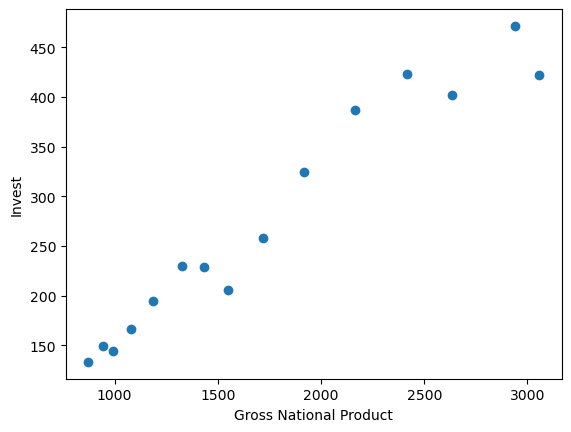

In [4]:
plt.scatter(data['gnp'], data['invest'])
plt.xlabel('Gross National Product')
plt.ylabel('Invest')

# Question 3:

In [5]:
X = np.log(data['gnp'])
y = np.log(data['invest'])

In [6]:
X_bar = np.mean(X)
y_bar = np.mean(y)

beta1 = np.sum((X - X_bar)*(y - y_bar))/np.sum((X - X_bar)**2)
beta0 =  y_bar - beta1*X_bar

n = X.shape[0]
y_pred = beta0 + X*beta1
residual = y - y_pred
var = 1/(n-2) * np.sum(residual**2)

sd_beta1 = np.sqrt(var/np.sum((X - X_bar)**2))
sd_beta0 = np.sqrt(var*(1/n + X_bar**2/np.sum((X - X_bar)**2)))
print(f"The intercept is :{beta0.round(4)} and its standard deviation is: {sd_beta0.round(4)}")
print(f"The slope is :{beta1.round(4)} and its standard deviation is : {sd_beta1.round(4)}")

The intercept is :-1.9636 and its standard deviation is: 0.4095
The slope is :1.0153 and its standard deviation is : 0.0554


In [7]:
R2 = 1 - np.sum(residual**2)/np.sum((y - y_bar)**2)
print(f"The determination coefficient is: R2 = {R2.round(4)}")

The determination coefficient is: R2 = 0.9628


In [8]:
var

0.0076763385554603995

# Question 4:

In [9]:
t_stat = beta1/sd_beta1

p_value = (1 - stat.t.cdf(np.abs(t_stat), n-2))*2
print(f"t = {t_stat} with p-value: {p_value}")

t = 18.331984456866678 with p-value: 1.1363709973011282e-10


# Question 5:

In [10]:
x0 = 1000
ln_x0 = np.log(x0)
ln_y0 = beta0 + ln_x0*beta1

def V_conf(x_pred):
    # x_pred = x_pred.reshape()
    return var*x_pred*1/np.sum(X*X)*x_pred

def V_pred(x_pred):
    return var + V_conf(x_pred)

def interval(alpha):
    return stat.t.ppf(1 - (1 - alpha)/2, n-2)

alpha = 0.9
conf_interval = [ln_y0 - interval(alpha)*np.sqrt(V_conf(ln_x0)), ln_y0 + interval(alpha)*np.sqrt(V_conf(ln_x0))]
pred_interval = [ln_y0 - interval(alpha)*np.sqrt(V_pred(ln_x0)), ln_y0 + interval(alpha)*np.sqrt(V_pred(ln_x0))]

print(f"Confidence interval is from {np.exp(conf_interval[0])} to {np.exp(conf_interval[1])}")
print(f"Prediction interval is from {np.exp(pred_interval[0])} to {np.exp(pred_interval[1])}")

Confidence interval is from 150.25001943038887 to 161.92731308744425
Prediction interval is from 132.96885980025584 to 182.97202799397357


# Question 6:

# Question 7:

In [11]:
from sklearn.linear_model import LinearRegression
import math

lr = LinearRegression()
lr.fit(X.to_numpy().reshape(-1, 1), y)
ln_y_pred = lr.predict(ln_x0.reshape(1,1))[0]
print(f"The predicted value is: {np.exp(ln_y_pred)}")
flag = math.isclose(np.exp(ln_y0), np.exp(ln_y_pred))
if flag == False:
    print("Predicted values by 2 methods are coincised")

The predicted value is: 155.97942793105494


# Question 8:

Text(0, 0.5, 'Investment')

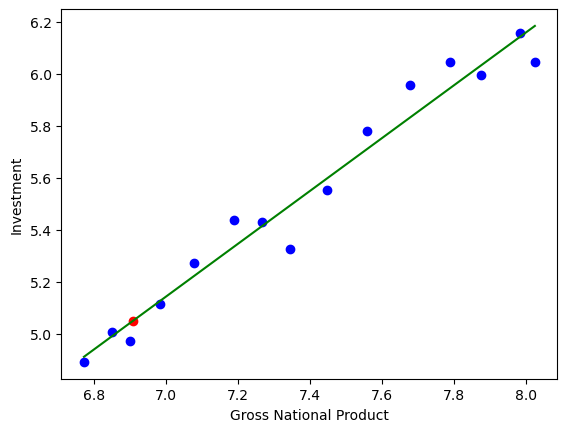

In [12]:
plt.scatter(X, y, c='blue')
plt.scatter(ln_x0, ln_y0, c='red')

max_gnp = np.max(X)
min_gnp = np.min(X)
max_investment = beta0 + max_gnp*beta1
min_investment = beta0 + min_gnp*beta1
plt.plot([min_gnp, max_gnp], [min_investment, max_investment], c='green')
plt.xlabel('Gross National Product')
plt.ylabel('Investment')

# Question 9:

In [13]:
data['log_gnp'] = np.log(data['gnp'])
X = np.asarray(data[['log_gnp', 'interest']])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
y = np.log(data['invest'])

In [14]:
X

array([[ 1.        ,  6.77239364,  5.16      ],
       [ 1.        ,  6.85012617,  5.87      ],
       [ 1.        ,  6.9004285 ,  5.95      ],
       [ 1.        ,  6.98249163,  4.88      ],
       [ 1.        ,  7.07825726,  4.5       ],
       [ 1.        ,  7.19022378,  6.44      ],
       [ 1.        ,  7.26836248,  7.83      ],
       [ 1.        ,  7.34549395,  6.25      ],
       [ 1.        ,  7.4489161 ,  5.5       ],
       [ 1.        ,  7.55919466,  5.46      ],
       [ 1.        ,  7.67966743,  7.46      ],
       [ 1.        ,  7.79061331, 10.28      ],
       [ 1.        ,  7.87591714, 11.77      ],
       [ 1.        ,  7.98538224, 13.42      ],
       [ 1.        ,  8.02535287, 11.02      ]])

In [15]:
gram = X.T@X
eig_values, _ = np.linalg.eig(gram)
print(f'Number of non zero eigen values is {np.sum(eig_values!=0)}')


Number of non zero eigen values is 3


The gram matrix has size (3, 3), thus this matrix is full size.

# Question 10:

In [16]:
G_inv = np.linalg.inv(gram)

In [17]:
coef = G_inv@X.T@y

In [18]:
coef

array([-2.18045473,  1.05124269, -0.00652888])

Consider the estimator is unbiased, the variance of error is:

In [19]:
SSE = y @ (np.eye(n) - X @ G_inv @ X.T) @ y
var_coef = SSE / (n - 3)
cov_coef = var_coef * G_inv
tss = coef / np.sqrt(np.diag(cov_coef))

In [20]:
#The p-value of the test
(1 - stat.t.cdf(np.abs(tss), n-3))*2

array([6.43836707e-03, 2.59951686e-07, 6.78007142e-01])

The p-value corresponding to interest value is large, 

# Question 11:

In [44]:
x0_gnp = 1000
x0_interest = 10

x0 = np.array([1, np.log(x0_gnp), x0_interest])
ln_y0 = x0@coef

def V_conf(x_pred):
    # x_pred = x_pred.reshape()
    return var*x_pred@G_inv@x_pred.T

def V_pred(x_pred):
    return var + V_conf(x_pred)

def interval(alpha):
    return stat.t.ppf(1 - (1 - alpha)/2, n-3)


alpha=0.999

print(f'Confidence interval: from {ln_y0 - interval(alpha)*np.sqrt(V_conf(x0))} to {ln_y0 + interval(alpha)*np.sqrt(V_conf(x0))}')
print(f'Prediction interval: from {ln_y0 - interval(alpha)*np.sqrt(V_pred(x0))} to {ln_y0 + interval(alpha)*np.sqrt(V_pred(x0))}')

Confidence interval: from 4.652213601393146 to 5.379753859569921
Prediction interval: from 4.491158850185922 to 5.540808610777145


# Question 12:

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 60)

# Data points
ax.scatter(X[:, 1], X[:, 2], y, c='b', label='Investment data')

# Predicted points
predY = X @ coef
ax.scatter(X[:, 1], X[:, 2], predY, c='k', label='Predicted data')

# Regression plane
xs3drange = np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.1)
ys3drange = np.arange(np.min(X[:, 2]), np.max(X[:, 2]), 0.5)
xs3d, ys3d = np.meshgrid(xs3drange, ys3drange)

surf3d = coef[0] + coef[1] * xs3d + coef[2] * ys3d
ax.plot_wireframe(xs3d, ys3d, surf3d, color='r', label='Regression plane')

# Confidence planes
extX = np.array([np.ones(xs3d.shape[0] * xs3d.shape[1]), xs3d.ravel(), ys3d.ravel()]).T

conf = np.sqrt(var_coef * np.sum(((extX @ G_inv) * extX).T, axis=0)).reshape(len(xs3d), len(xs3d[0]))

confLowY, confUppY = surf3d + t_I_conf(alpha, n - 3)[:, None, None] * conf[None, :, :]

ax.plot_wireframe(xs3d, ys3d, confLowY, color='g', label='Confidence planes')
ax.plot_wireframe(xs3d, ys3d, confUppY, color='g')

ax.set_title('Investment data')
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest rate')
ax.set_zlabel('log(Investment)')
ax.legend()
plt.show()